## Players Position Dataset Generator

This notebook is only meant to generate a dataset of football players by position (Goalkeeper or Outfield). 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read Original Data

In [2]:
df = pd.read_csv('../../data/football/Player.csv')
pdf = pd.read_csv('../../data/football/Player_Attributes.csv')

Each of the 11060 players actually has multiple corresponding rows in `Player_Attributes.csv`. Let's just take the first entries for each player.

In [3]:
pdf = pdf.groupby('player_api_id', as_index=False).first()

Join the two data

In [4]:
all_df = pd.merge(df, pdf, how='inner', left_on='player_api_id', right_on='player_api_id')

In [5]:
all_df.columns

Index(['id_x', 'player_api_id', 'player_name', 'player_fifa_api_id_x',
       'birthday', 'height', 'weight', 'id_y', 'player_fifa_api_id_y', 'date',
       'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

To keep things simple, we'll only use two position for the players: Goalkeeper and Outfield. We can find that out by looking at any of the goalkeeping skills. 

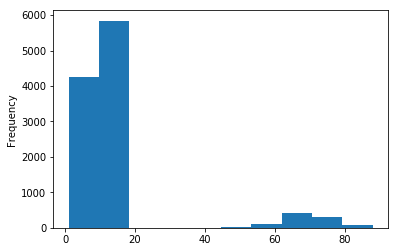

In [6]:
all_df['gk_diving'].plot.hist()

Looks like a threshold of say 40 for `gk_diving` cleanly separates outfield players and goalkeepers.

In [7]:
all_df['Position'] = all_df['gk_diving'].map(lambda x: 'GK' if x > 40 else 'Outfield')

In [8]:
all_df.shape

(11060, 49)

In [9]:
# Only take 100 samples of each position
outfield_samples = all_df[all_df['Position'] == 'Outfield'].sample(n=100, random_state=42)
gk_samples = all_df[all_df['Position'] == 'GK'].sample(n=100, random_state=42)

In [10]:
final_df = pd.concat([outfield_samples, gk_samples])

In [11]:
# Shuffle rows
final_df = final_df.sample(frac=1, random_state=42)

In [12]:
# Keep only relevant rows
final_df = final_df[['player_api_id', 'player_name', 'height', 'weight', 'Position']]

Let's quickly look at the data.

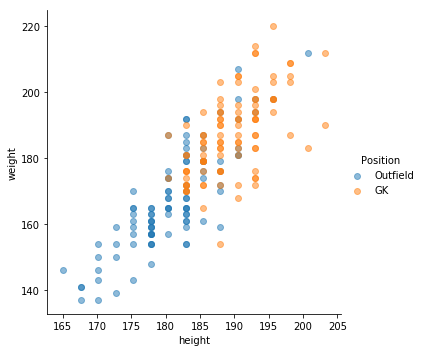

In [13]:
sns.lmplot(x='height', y='weight', data=final_df, hue='Position', scatter_kws={'alpha': 0.5}, fit_reg=False)

In [14]:
final_df.to_csv('../../data/players.csv', index=False)